In [127]:
#The entire Image Processing Program were written, documentated and improvised by
#Sheekar Banerjee, A.I. Research Engineer, Cisscom LLC, USA

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

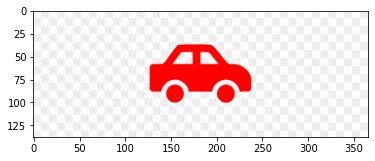

In [128]:
image = cv2.imread('car.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The type of this input is <class 'numpy.ndarray'>
Shape: (138, 366, 3)


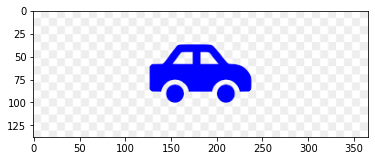

In [129]:
image = cv2.imread('car.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

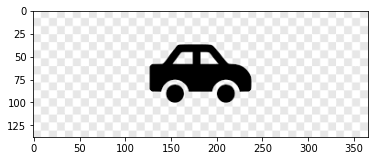

In [130]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

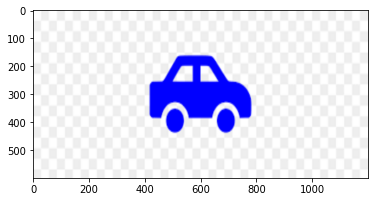

In [131]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [132]:
#Color Identification:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [133]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [134]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([237.95973242, 237.87670637, 237.87670637]),
 array([2.54994546e+02, 2.36861542e-01, 2.36861542e-01]),
 array([254.47798593, 254.4826742 , 254.4826742 ]),
 array([251.61480687, 106.70922747, 106.70922747]),
 array([248.81694255, 176.70788705, 176.70788705]),
 array([245.        , 245.04472643, 245.04472643]),
 array([253.74486301,  47.18493151,  47.18493151])]

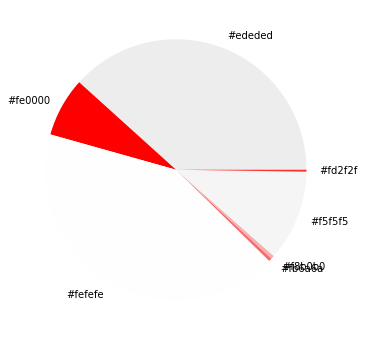

In [135]:
get_colors(get_image('car.png'), 7, True)

In [136]:
#Search Images using Colors (Give the input by RGB defined Colors)
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [255, 0, 0],
    'VIOLET': [218,112,214]
}
images = []

for file in os.listdir('/content/Image folder'):
    if not file.startswith('.'):
        images.append(get_image(os.path.join('/content/Image folder', file)))

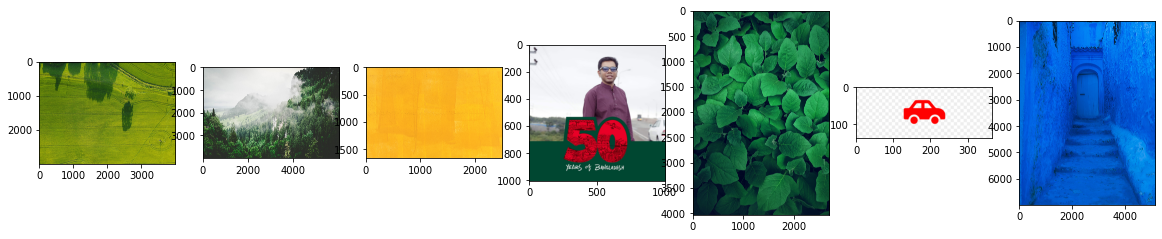

In [137]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [138]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [139]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

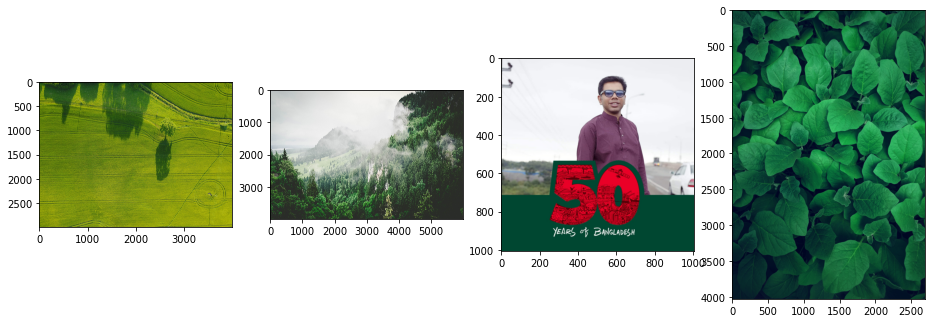

In [140]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

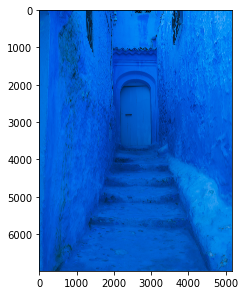

In [141]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

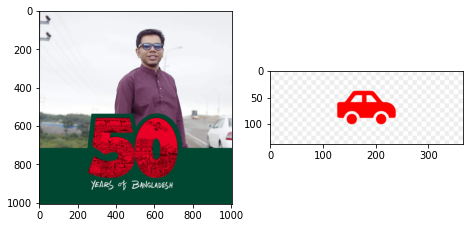

In [142]:
# Search for RED
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)